In [1]:
import pandas as pd
from scipy.stats import ranksums
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

tips = pd.read_csv('tips_atualizado.csv')
tips

,total_bill,tip,dessert,day,time,size
0,16.990000,1.010000,No,Sun,Dinner,2
1,10.340000,1.660000,No,Sun,Dinner,3
2,21.010000,3.500000,No,Sun,Dinner,3
3,23.680000,3.310000,No,Sun,Dinner,2
4,24.590000,3.610000,No,Sun,Dinner,4
...,...,...,...,...,...,...
3411,26.330845,4.729032,No,Sat,Dinner,3
3412,25.531567,1.604021,Yes,Sat,Dinner,2
3413,21.547132,1.733914,Yes,Sat,Dinner,2
3414,18.966233,1.718951,No,Sat,Dinner,2


In [2]:
colunas = {'total_bill':'Valor da Conta', 'tip':'Valor da Gorjeta', 'dessert':'Sobremesa',
            'day':'Dia da Semana', 'time':'Hora do Dia', 'size':'Total de Pessoas'}
gorjetas = tips.rename(columns = colunas)
sim_nao = {'No':'Não', 'Yes':'Sim'}
gorjetas['Sobremesa'] = gorjetas['Sobremesa'].map(sim_nao)
dias = {'Sun':'Domingo', 'Sat':'Sábado', 'Thur':'Quinta', 'Fri':'Sexta'}
gorjetas['Dia da Semana'] = gorjetas['Dia da Semana'].map(dias)
hora = {'Dinner':'Jantar', 'Lunch':'Almoço'}
gorjetas['Hora do Dia'] = gorjetas['Hora do Dia'].map(hora)
gorjetas['Gorjeta(%/Conta)'] = (gorjetas['Valor da Gorjeta'] / gorjetas['Valor da Conta']).round(2)
gorjetas.index = range(1, (gorjetas.shape[0]+1))
gorjetas

,Valor da Conta,Valor da Gorjeta,Sobremesa,Dia da Semana,Hora do Dia,Total de Pessoas,Gorjeta(%/Conta)
1,16.990000,1.010000,Não,Domingo,Jantar,2,0.06
2,10.340000,1.660000,Não,Domingo,Jantar,3,0.16
3,21.010000,3.500000,Não,Domingo,Jantar,3,0.17
4,23.680000,3.310000,Não,Domingo,Jantar,2,0.14
5,24.590000,3.610000,Não,Domingo,Jantar,4,0.15
...,...,...,...,...,...,...,...
3412,26.330845,4.729032,Não,Sábado,Jantar,3,0.18
3413,25.531567,1.604021,Sim,Sábado,Jantar,2,0.06
3414,21.547132,1.733914,Sim,Sábado,Jantar,2,0.08
3415,18.966233,1.718951,Não,Sábado,Jantar,2,0.09


In [3]:
print(f'A base de dados contém {gorjetas.shape[0]} registros\nRegistros não nulos:')
gorjetas.count()

A base de dados contém 3416 registros
Registros não nulos:


Valor da Conta      3416
Valor da Gorjeta    3416
Sobremesa           3416
Dia da Semana       3416
Hora do Dia         3416
Total de Pessoas    3416
Gorjeta(%/Conta)    3416
dtype: int64

Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta...
Porém, o valor proporcional da gorjeta diminui:


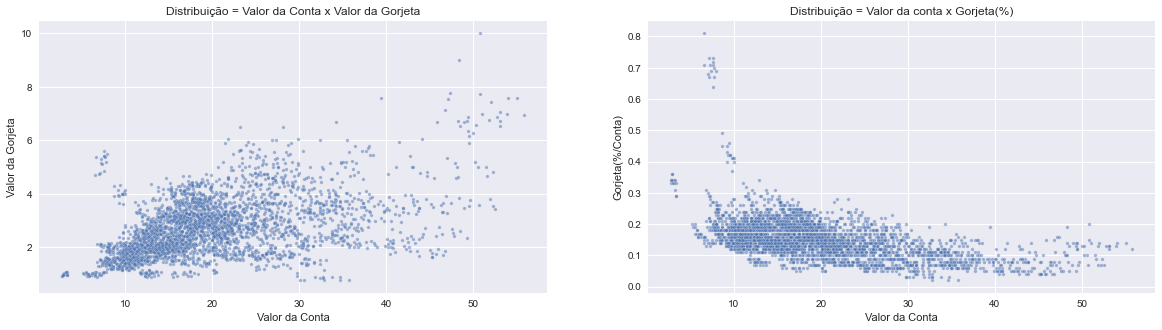

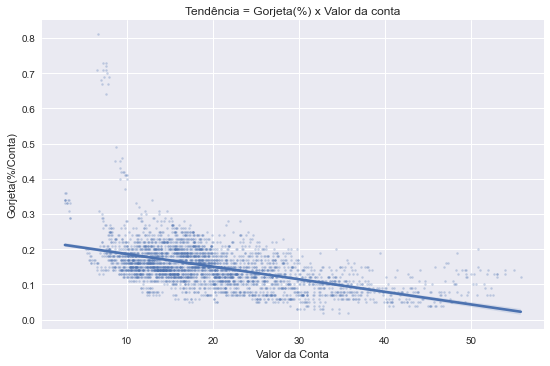

In [4]:
fig, ax =plt.subplots(1,2, figsize=(20, 5))
sns.scatterplot(x='Valor da Conta', y='Valor da Gorjeta', data=gorjetas, s=12, alpha=.5, ax=ax[0]).set(title='Distribuição = Valor da Conta x Valor da Gorjeta')
sns.scatterplot(x='Valor da Conta', y='Gorjeta(%/Conta)', data=gorjetas, s=12, alpha=.5, ax=ax[1]).set(title='Distribuição = Valor da conta x Gorjeta(%)')
sns.lmplot(x='Valor da Conta', y='Gorjeta(%/Conta)', data=gorjetas, height=5, aspect=1.55, scatter_kws={'s':6, 'alpha':.3}).set(title='Tendência = Gorjeta(%) x Valor da conta')

print('Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta...\nPorém, o valor proporcional da gorjeta diminui:')

In [5]:
sobremesa = gorjetas.groupby('Sobremesa')
sobremesa[['Valor da Conta', 'Valor da Gorjeta', 'Total de Pessoas', 'Gorjeta(%/Conta)']].aggregate(['count', 'mean', 'min', 'max']).rename(columns={'count':'Total', 'mean':'Media', 'min':'Minimo', 'max':'Maximo'}).round(2)

Valor da Conta                      Valor da Gorjeta               \
                   Total  Media Minimo Maximo            Total Media Minimo   
Sobremesa                                                                     
Não                 2114  19.22   6.53  53.09             2114  2.71   0.91   
Sim                 1302  20.80   2.80  55.80             1302  2.71   0.77   

                 Total de Pessoas                     Gorjeta(%/Conta)        \
          Maximo            Total Media Minimo Maximo            Total Media   
Sobremesa                                                                      
Não          9.0             2114  2.67      1      6             2114  0.15   
Sim         10.0             1302  2.41      1      5             1302  0.15   

                         
          Minimo Maximo  
Sobremesa                
Não         0.04   0.33  
Sim         0.02   0.81

Analisando a relação entre o valor da gorjeta e o valor da conta, por pedido de sobremesa:


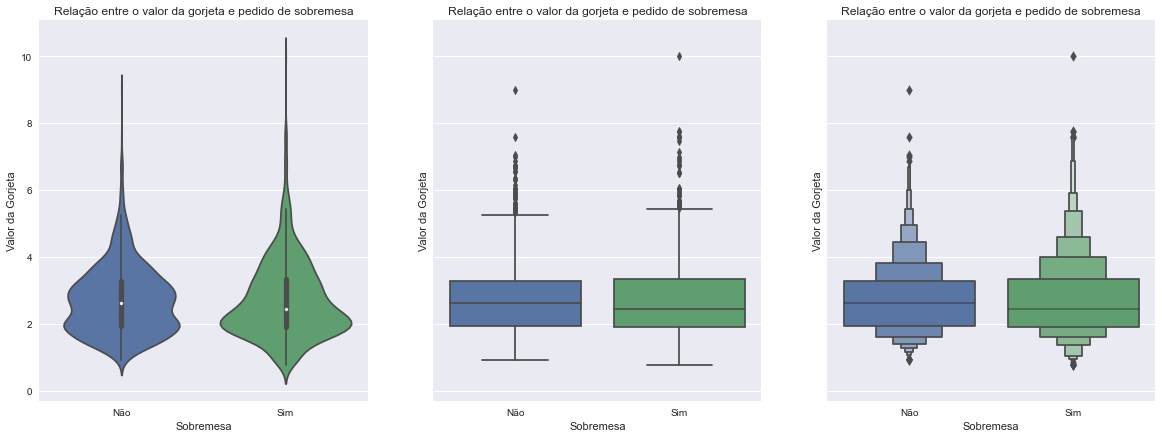

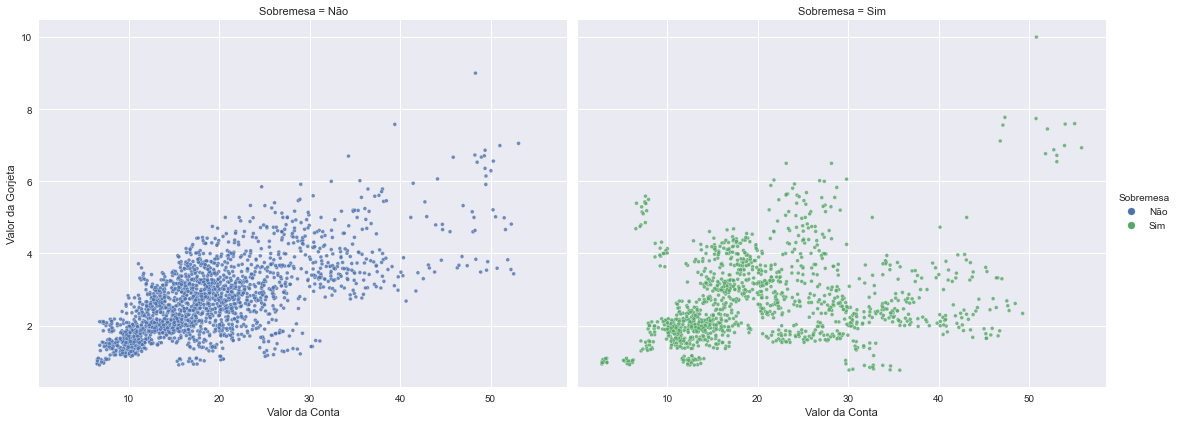

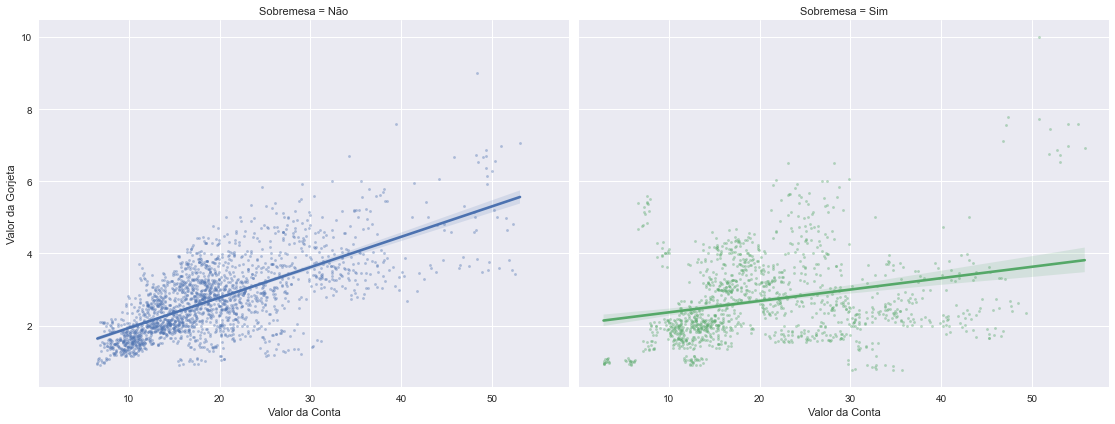

In [6]:
fig, ax =plt.subplots(1,3, figsize=(20, 7), sharey=True)
sns.violinplot(x='Sobremesa', y='Valor da Gorjeta', data=gorjetas, ax=ax[0]).set(title='Relação entre o valor da gorjeta e pedido de sobremesa')
sns.boxplot(x='Sobremesa', y='Valor da Gorjeta', data=gorjetas, ax=ax[1]).set(title='Relação entre o valor da gorjeta e pedido de sobremesa')
sns.boxenplot(x='Sobremesa', y='Valor da Gorjeta', data=gorjetas, ax=ax[2]).set(title='Relação entre o valor da gorjeta e pedido de sobremesa')
sns.relplot(x='Valor da Conta', y='Valor da Gorjeta', hue='Sobremesa', col='Sobremesa', data=gorjetas, height=6, aspect=1.3, s=15, alpha=.8)
sns.lmplot(x='Valor da Conta', y='Valor da Gorjeta', col='Sobremesa', hue='Sobremesa', data=gorjetas,  height=6, aspect=1.3, scatter_kws={'s':8, 'alpha':.4})

print('Analisando a relação entre o valor da gorjeta e o valor da conta, por pedido de sobremesa:')

Analisando a relação entre a proporção valor da gorjeta e pedido de sobremesa:


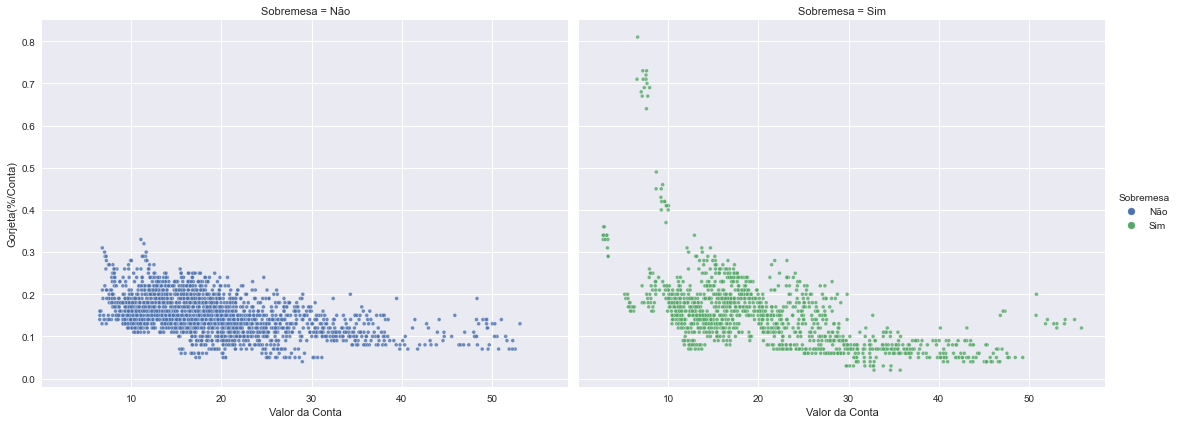

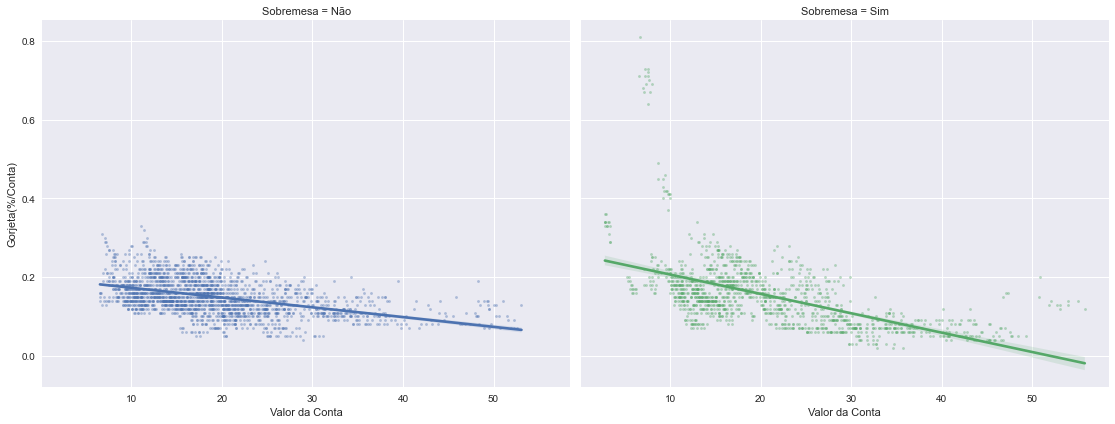

In [7]:
sns.relplot(x='Valor da Conta', y='Gorjeta(%/Conta)', hue='Sobremesa', col='Sobremesa', data=gorjetas, height=6, aspect=1.3, s=15, alpha=.8)
sns.lmplot(x='Valor da Conta', y='Gorjeta(%/Conta)', col='Sobremesa', hue='Sobremesa', data=gorjetas,  height=6, aspect=1.3, scatter_kws={'s':8, 'alpha':.4})
print('Analisando a relação entre a proporção valor da gorjeta e pedido de sobremesa:')

In [8]:
com_sobremesa = gorjetas.query('Sobremesa == "Sim"')['Gorjeta(%/Conta)']
sem_sobremesa = gorjetas.query('Sobremesa == "Não"')['Gorjeta(%/Conta)']
r1 = ranksums(com_sobremesa, sem_sobremesa)
print(f'O valor do p-value é {(r1.pvalue).round(4)}\nA sobremesa afeta a distribuição da taxa da gorjeta')

O valor do p-value é 0.0331
A sobremesa afeta a distribuição da taxa da gorjeta


Analisando a relação entre o valor da conta pelos dias da semana:


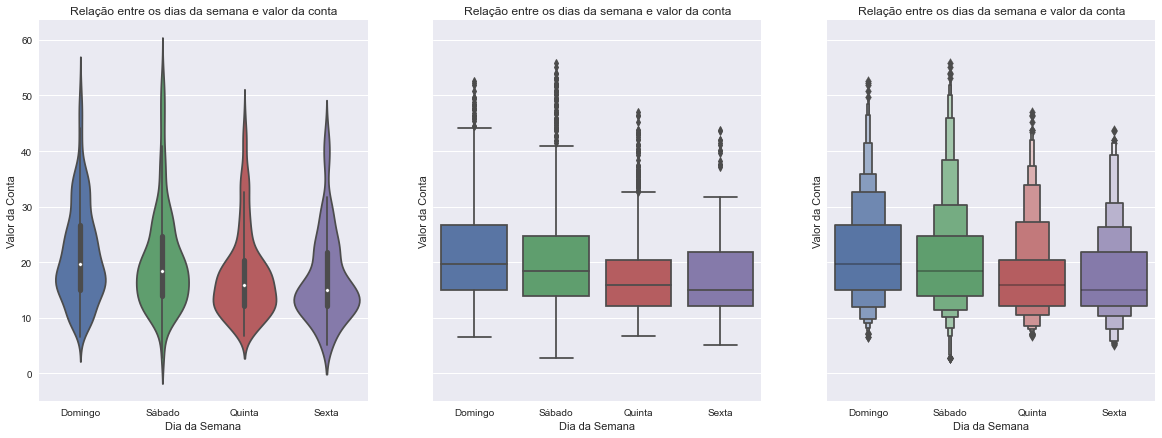

In [9]:
fig, ax =plt.subplots(1,3, figsize=(20, 7), sharey=True)
sns.violinplot(x='Dia da Semana', y='Valor da Conta', data=gorjetas, ax=ax[0]).set(title='Relação entre os dias da semana e valor da conta')
sns.boxplot(x='Dia da Semana', y='Valor da Conta', data=gorjetas, ax=ax[1]).set(title='Relação entre os dias da semana e valor da conta')
sns.boxenplot(x='Dia da Semana', y='Valor da Conta', data=gorjetas, ax=ax[2]).set(title='Relação entre os dias da semana e valor da conta')
print('Analisando a relação entre o valor da conta pelos dias da semana:')

Analisando a relação entre valor da conta e valor da gorjeta, pelos dias da semana:


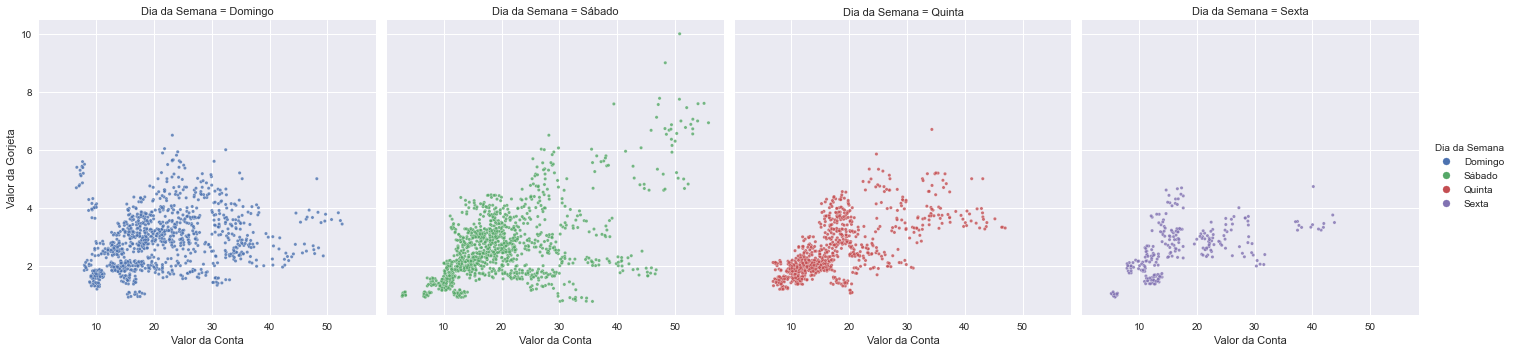

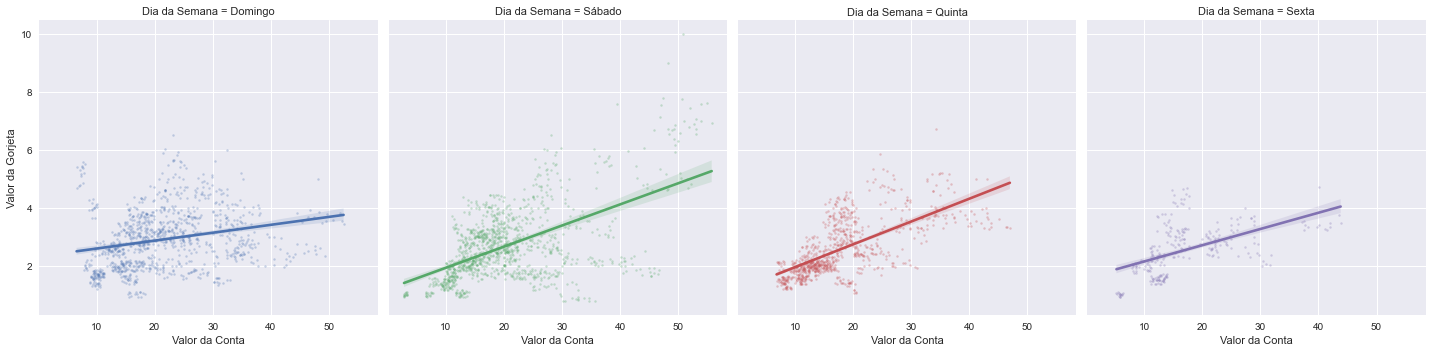

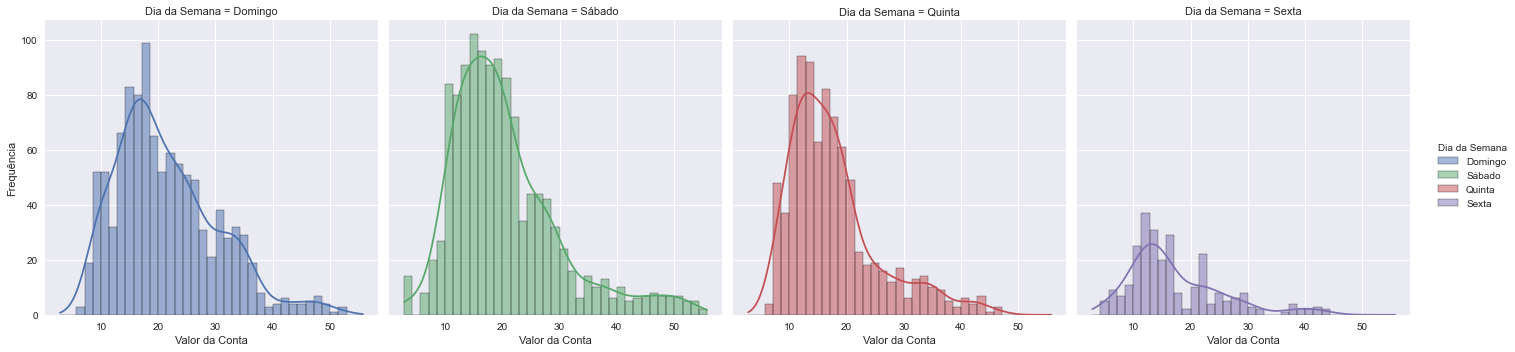

In [10]:
sns.relplot(x='Valor da Conta', y='Valor da Gorjeta', hue='Dia da Semana', col='Dia da Semana', data=gorjetas, s=11, alpha=.8)
sns.lmplot(x='Valor da Conta', y='Valor da Gorjeta', hue='Dia da Semana', col='Dia da Semana', data=gorjetas, scatter_kws={'s':6, 'alpha':.3})
sns.displot(x='Valor da Conta', col='Dia da Semana', hue='Dia da Semana', kde=True, data=gorjetas).set(ylabel='Frequência')
print('Analisando a relação entre valor da conta e valor da gorjeta, pelos dias da semana:')

Analisando a relação entre o valor da conta e proporção do valor da gorjeta, pelos dias da semana:


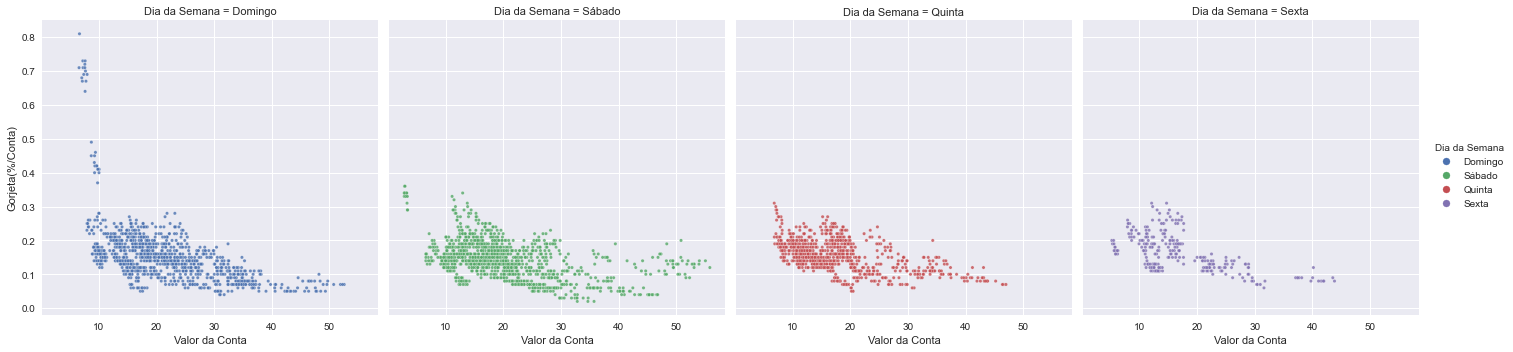

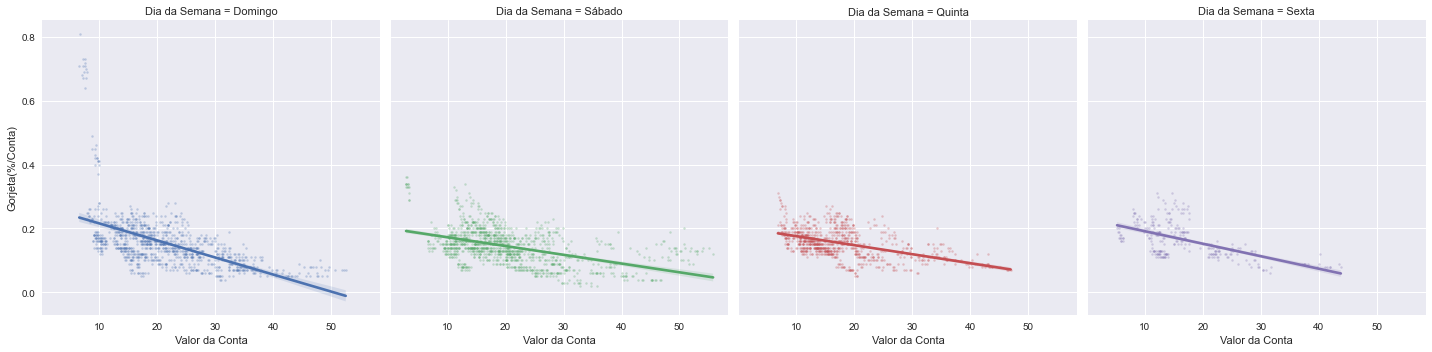

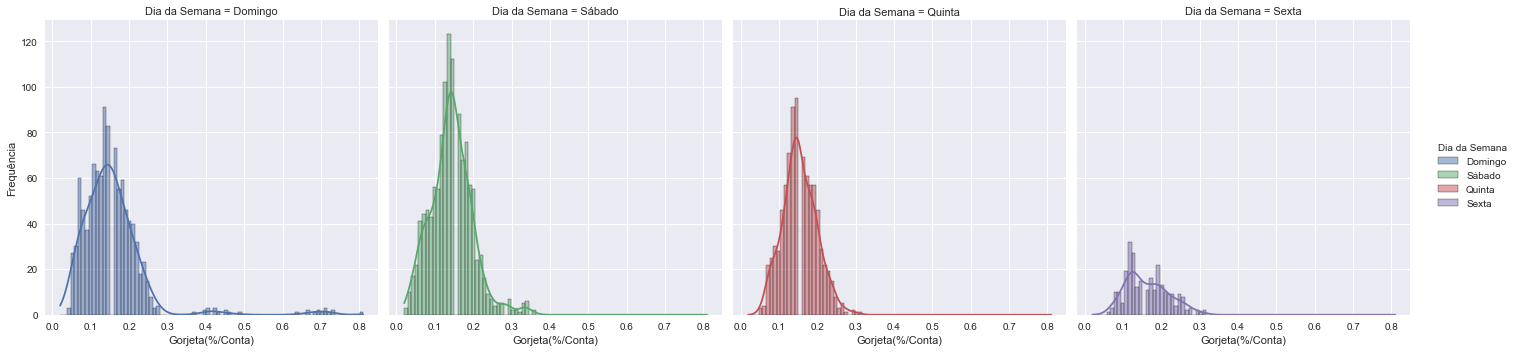

In [11]:
sns.relplot(x='Valor da Conta', y='Gorjeta(%/Conta)', hue='Dia da Semana', col='Dia da Semana', data=gorjetas, s=11, alpha=.8)
sns.lmplot(x='Valor da Conta', y='Gorjeta(%/Conta)', hue='Dia da Semana', col='Dia da Semana', data=gorjetas, scatter_kws={'s':6, 'alpha':.3})
sns.displot(x='Gorjeta(%/Conta)', col='Dia da Semana', hue='Dia da Semana', kde=True, data=gorjetas).set(ylabel='Frequência')
print('Analisando a relação entre o valor da conta e proporção do valor da gorjeta, pelos dias da semana:')

In [12]:
media_gorjetas = gorjetas['Valor da Gorjeta'].mean().round(2)
print(f'A média geral do valor das gorjetas é de R${media_gorjetas}')
gorjetas.groupby(['Dia da Semana']).mean()[['Valor da Conta', 'Valor da Gorjeta', 'Gorjeta(%/Conta)']].round(2)

A média geral do valor das gorjetas é de R$2.71


,Valor da Conta,Valor da Gorjeta,Gorjeta(%/Conta)
Dia da Semana,,,
Domingo,21.44,2.90,0.15
Quinta,17.72,2.56,0.15
Sexta,17.22,2.55,0.16
Sábado,20.48,2.69,0.14


In [13]:
print('Frequência dos dias:')
gorjetas['Dia da Semana'].value_counts()

Frequência dos dias:


Sábado     1218
Domingo    1064
Quinta      868
Sexta       266
Name: Dia da Semana, dtype: int64

In [14]:
valor_conta_domingo = gorjetas[gorjetas['Dia da Semana'] == 'Domingo']['Valor da Conta']
valor_conta_sabado = gorjetas[gorjetas['Dia da Semana'] == 'Sábado']['Valor da Conta']
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print(f'O valor do p-value é {r2.pvalue.round(4)}\nA distribuição de valor da conta não é igual no Sábado e no Domingo')

O valor do p-value é 0.0004
A distribuição de valor da conta não é igual no Sábado e no Domingo


Analisando a relação entre o valor da conta e hora do dia:


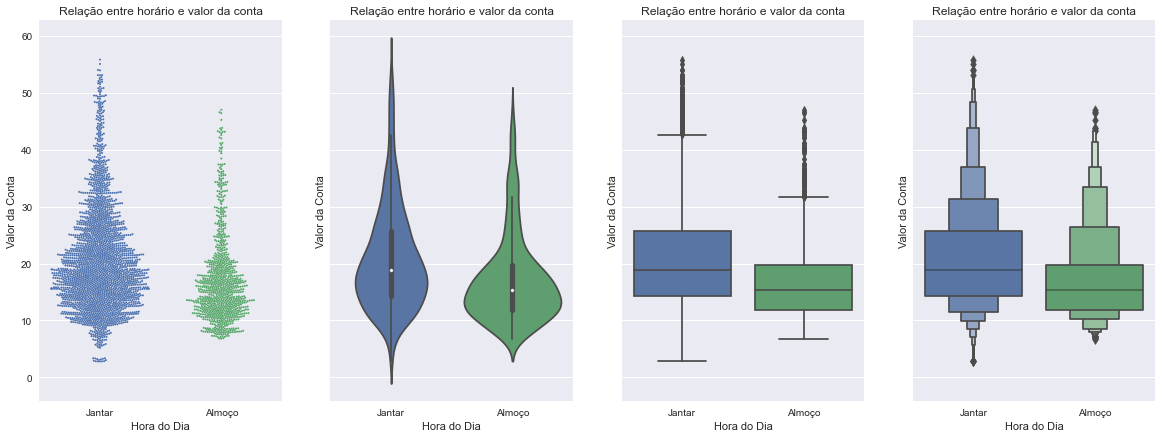

In [15]:
fig, ax =plt.subplots(1,4, figsize=(20, 7), sharey=True)
sns.swarmplot(x='Hora do Dia', y='Valor da Conta', s=2, data=gorjetas, ax=ax[0]).set(title='Relação entre horário e valor da conta')
sns.violinplot(x='Hora do Dia', y='Valor da Conta', data=gorjetas, ax=ax[1]).set(title='Relação entre horário e valor da conta')
sns.boxplot(x='Hora do Dia', y='Valor da Conta', data=gorjetas, ax=ax[2]).set(title='Relação entre horário e valor da conta')
sns.boxenplot(x='Hora do Dia', y='Valor da Conta', data=gorjetas, ax=ax[3]).set(title='Relação entre horário e valor da conta')
print('Analisando a relação entre o valor da conta e hora do dia:')

Comparando a relação entre o valor da conta e a hora do dia:


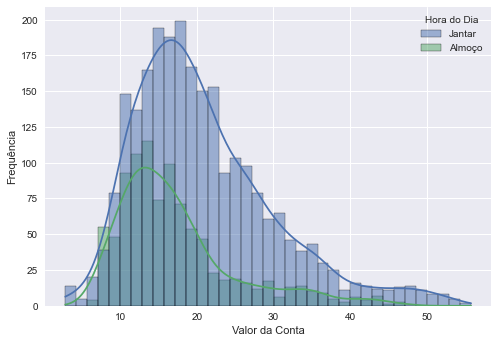

In [16]:
sns.histplot(x='Valor da Conta', hue='Hora do Dia', kde=True, data=gorjetas).set(ylabel='Frequência')
print('Comparando a relação entre o valor da conta e a hora do dia:')

In [17]:
almoco = gorjetas[gorjetas['Hora do Dia'] == 'Almoço']['Valor da Conta']
jantar = gorjetas[gorjetas['Hora do Dia'] == 'Jantar']['Valor da Conta']
r3 = ranksums(jantar, almoco)
print(f'O valor do p-value é de {r3.pvalue}\nA distribuição de valor da conta é igual no almoço e no jantar')

gorjetas.groupby(['Hora do Dia']).mean()[['Valor da Conta', 'Valor da Gorjeta', 'Gorjeta(%/Conta)']].round(2)

O valor do p-value é de 5.169201062207143e-34
A distribuição de valor da conta é igual no almoço e no jantar


,Valor da Conta,Valor da Gorjeta,Gorjeta(%/Conta)
Hora do Dia,,,
Almoço,17.21,2.53,0.16
Jantar,20.83,2.78,0.15


In [18]:
porcentagem_almoco = gorjetas[gorjetas['Hora do Dia'] == 'Almoço']['Gorjeta(%/Conta)']
porcentagem_jantar = gorjetas[gorjetas['Hora do Dia'] == 'Jantar']['Gorjeta(%/Conta)']
r4 = ranksums(porcentagem_almoco, porcentagem_jantar)
print(f'O valor do p-value é de {r4.pvalue}\nA distribuição do valor proporcional de gorjeta é igual no almoço e no jantar')

O valor do p-value é de 1.3785725618355523e-11
A distribuição do valor proporcional de gorjeta é igual no almoço e no jantar
